In [19]:
import sys
sys.path.append("..")   # add the root project folder to the system path variable
from schuberts_leader.core_components import create_linear_splines, estimate_OLS_linear_model_coefs, generate_linear_model_preds, mean_squared_error, simulate_leading_indicator_data
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Simulate some data for us to use:

( documentation is available using `help(simulate_leading_indicator_data)` )

In [145]:
sim_explain_dict, y_arr, X_arr = simulate_leading_indicator_data(
        n_time_points = 1_000
    ,   n_predictors = 50
    ,   n_leading_indicator_effects = 10
    ,   lagged_effect_time_min_max = (1,99)
    ,   polynomial_coefs_min_max = (
        (-1,1),
        (-0.01,0.01), #(-0.002,0.002),
        (-0.0001,0.0001), #(-0.00002,0.00002),
    )
)

Have a look at a (random) few of the simulated leading relationships:

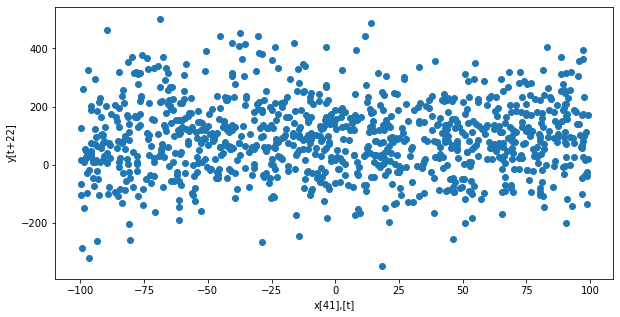

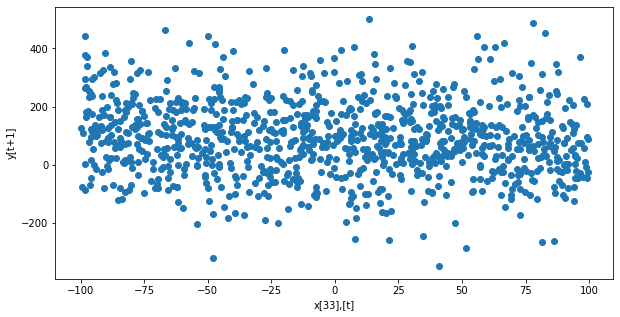

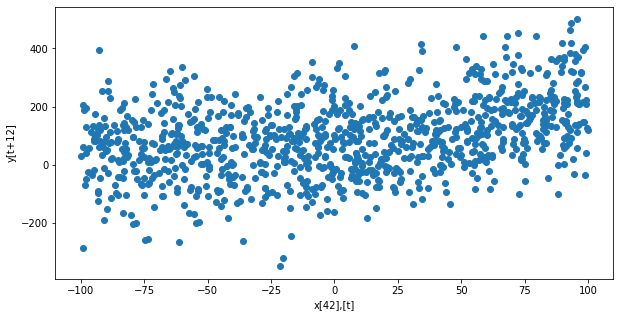

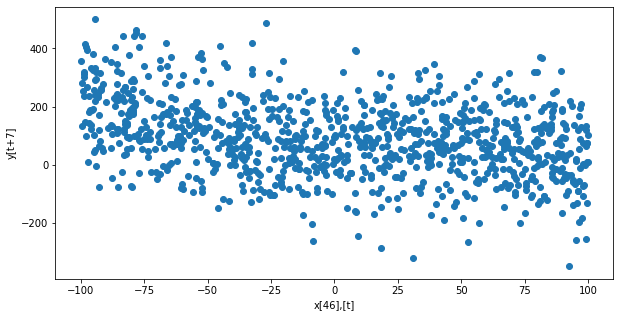

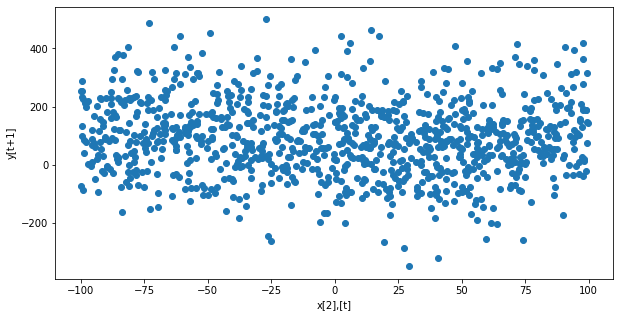

In [146]:
for k in np.random.choice(list(sim_explain_dict.keys()), size=5, replace=False):
    lag_i = sim_explain_dict[k][0]["lag"]
    plt.figure( figsize=(10,5) )
    plt.scatter( X_arr[:(len(X_arr)-lag_i),k], y_arr[lag_i:] )
    plt.xlabel( f"x[{k}],[t]" )
    plt.ylabel( f"y[t+{lag_i}]" )

split the data into a training and a test partition:

In [149]:
test_percent = 0.1
train_idx = ( 0, int((1-test_percent)*len(y_arr))-1 ) 
test_idx = (train_idx[1]+1, len(y_arr))
train_y_arr = y_arr[train_idx[0]:train_idx[1]+1] 
test_y_arr = y_arr[test_idx[0]:test_idx[1]] 
train_X_arr = X_arr[train_idx[0]:train_idx[1]+1,:] 
test_X_arr = X_arr[test_idx[0]:test_idx[1],:]

mine the data for leading indicators:

In [150]:
print("test")

test
